# Método de Otsu para determinar el valor de umbral
Este método se utiliza para realizar umbrales de imágenes de manera automática. En la forma más simple, el algoritmo devuelve un umbral de intensidad único que separa los pixeles en 2 clases, primer plano y fondo. Este umbral se determina maximizando la varianza entre clases. Este método es más eficiente que el método del Umbral Básico Global, ya que no necesita que los valores de intensidad estén divididos en 2 grupos.

## Algoritmo de Ostu
**Valor inicial:** $A \in {\rm I\!R}^{m \times n}$ a escala de grises en formato de 8 bits. <br>
**Salida:** Parámetro T, que representa el valor del umbral.

0) Calcular el histograma de $A$. Sea $q \in {\rm I\!R}^{256}$ que contiene la cantidad de intensidad de la imagen $A$. <br>
1) Calcular el histograma normaliado $h \in {\rm I\!R}^{256}$

\begin{equation}
h = \dfrac{1}{m \cdot n} \cdot q
\end{equation}

\begin{equation}
h = [h_0, h_1, \ldots, h_{255}]
\end{equation}

2) Calcular el vector de suma acumulada del histograma normalizado $p \in {\rm I\!R}^{256}$

\begin{equation}
p(k) = \sum_{i=0}^{k} h(i)
\end{equation}

\begin{equation}
p = [p_0, p_1, \ldots, p_{255}]
\end{equation}

3) Calcular el vector de suma acumulada con peso $m_c \in {\rm I\!R}^{256}$

\begin{equation}
m_c(k) = \sum_{i=0}^{k} i \cdot h(i)
\end{equation}

\begin{equation}
m_c = [(m_c)_0, (m_c)_1, \ldots, (m_c)_{255}]
\end{equation}

4) Calcular el máximo valor de $m_c$. Se denominará $m_g \in {\rm I\!R}$, donde

\begin{equation}
m_g = m_c(255)
\end{equation}

5) Calcular el vector de varianza entre clases $\sigma^2_b \in {\rm I\!R}^{256}$, donde

\begin{equation}
\sigma^2_b(k) = \dfrac{[m_g \cdot p(k)-m_c(k)]^2}{p(k) \cdot (1-p(k))}
\end{equation}

6) El umbral $T$ óptimo es el valor donde se alcanza el máximo del vector $\sigma^2_b$, es decir

\begin{equation}
\sigma^2_b(T) = \max\limits_{k = 0,1,\ldots,255}\sigma^2_b(k)
\end{equation}

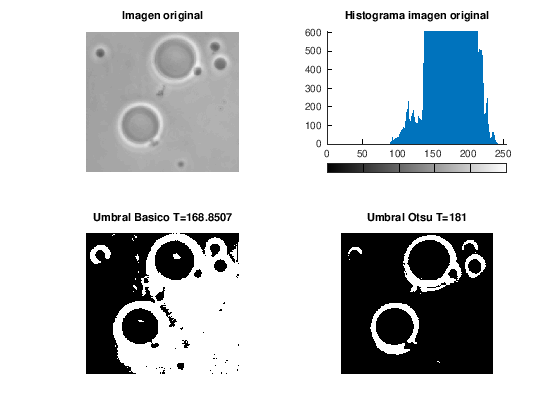

In [1]:
% Ejemplo de Umbral
clc; clear; close all;
pkg load image;
A = imread('media/umbral-imagen4.jpg');
subplot(2,2,1);
imshow(A);
title('Imagen original');

[m,n] = size(A);

% Histograma de la imagen original
subplot(2,2,2);
imhist(A);
title('Histograma imagen original');

% Umbral basico global
T = 165; iter = 15;
for k = 1:iter
  % Mascaras de los bloques
  I1 = (A>T);  % Matriz binaria, donde I1(i,j)=1 si A(i,j)>T
  I2 = (A<=T); % Matriz binaria, donde I1(i,j)=1 si A(i,j)<=T
  B1 = A.*I1;  % Bloque 1, donde se cumple que B1(i,j)=A(i,j), si A(i,j)>T;
               %                               B1(i,j)=0, si A(i,j)<=T;
  B2 = A.*I2;            
  m1 = sum(sum(B1))/sum(sum(I1)); % Promedio de intensidad del Bloque 1   
  m2 = sum(sum(B2))/sum(sum(I2)); % Promedio de intensidad del Bloque 1     
  T = 0.5*(m1+m2);
endfor

C = zeros(m,n);
C(A>T) = 1;
C(A<=T) = 0;
subplot(2,2,3);
imshow(C);
title(['Umbral Basico T=' num2str(T)]);

% Umbral metodo de Otsu
% Paso 0: Calcular el histograma de la imagen A
[q,~] = imhist(A);

% Paso 1: Calcular el histograma normalizado
h = (1/(m*n))*q;

% Paso 2: Calcular vector de suma acumulada
p = zeros(256,1);
for k = 1:256
  p(k) = sum(h(1:k));
endfor

% Paso 3: Calcular vector de suma acumulada con peso
mc = zeros(256,1);
for k = 1:256
  mc(k) = sum((0:k-1)'.*h(1:k));  
endfor

% Paso 4: Calcular el maximo de mc
mg = mc(256);

% Paso 5: Calcular vector de varianza entre clases
N = (mg*p-mc).^2;
D = p.*(1-p);
delta2b = N./D;

% Paso 6: Posicion maxima del vector delta2b
[~,T] = max(delta2b);
T = T-1; % Ya que Octave cuenta a partir del 1 y no del 0
% Mostrar imagen
D = zeros(m,n);
D(A>T) = 1;
D(A<=T) = 0;
subplot(2,2,4);
imshow(D);
title(['Umbral Otsu T=' num2str(T)]);


**Nota.** El método de Otsu se puede generalizar para el caso de tener 2 o más umbrales. Se explicará el caso para obtener los valores óptimos $T_1$ y $T_2$ tal que se separe en 3 tonalidades:

\begin{equation}
B(i,j)=\left\{\begin{matrix}
a & \text{si} & A(i,j)>T_2\\ 
b & \text{si} & T_1<A(i,j)<=T_2\\ 
c & \text{si} & A(i,j)<=T_1
\end{matrix}\right.
\end{equation}

## Algoritmo de Otsu para 2 umbrales
**Valor inicial:** Imagen $A \in {\rm I\!R}^{m \times n}$ en escala de grises y en 8 bits. <br>
**Valores finales:** Umbrales óptimos $T_1$,$T_2$.

0) Calcular el vector de histograma de $A$: $q  \in {\rm I\!R}^{256}$

1) Calcular el vector de histograma normalizado de $A$: $h \in {\rm I\!R}^{256}$

2) Vector de suma acumulada: $p \in {\rm I\!R}^{256}$

3) Vector de suma acumulada con peso: $m_c \in {\rm I\!R}^{256}$

4) Valor máximo de $m_c$: $m_g  \in {\rm I\!R}$

5) Para $k_1 = 0,1,\dots,255$ y $k_2 = 0,1,\ldots,255$, con $k_1<k_2$

6) Calcular $P_1$, $P_2$ y $P_3$ 

\begin{equation}
P_1 = \sum^{k_1}_{i=0} h(i) \quad P_2 = \sum^{k_2}_{i=k_1+1} h(i) \quad P_3 = \sum^{255}_{i=k_2+1} h(i)
\end{equation}

7) Calcular $m_1$, $m_2$ y $m_3$ 

\begin{equation}
m_1 = \dfrac{1}{P_1}\sum^{k_1}_{i=0} i\cdot h(i) \quad m_2 = \dfrac{1}{P_2}\sum^{k_2}_{i=k_1+1} i\cdot h(i) \quad m_3 = \dfrac{1}{P_3}\sum^{255}_{i=k_2+1} i\cdot h(i)
\end{equation}

8) Calcular $\sigma^2_B$

\begin{equation}
\sigma^2_B(k_1,k_2) = P_1(m_1-m_g)^2 + P_2(m_2-m_g)^2 + P_3(m_3-m_g)^2
\end{equation}

**Nota.** Si $P_1$, $P_2$ o $P_3$ son iguales a $0$, entonces no se calcula el $m_j$ respectivo, y se omite de la fórmula anterior.

9) Obtener los umbrales $T_1$ y $T_2$, que son las posiciones donde se alcanza el máximo en $\sigma^2_B$

\begin{equation}
\sigma^2_B(T_1,T_2) = \max\limits_{k<=k_1<k_2<=255} \sigma^2_B(k_1,k_2)
\end{equation}

In [2]:
function T = otsu(A)
  % Funcion que calcula el umbral utilizando el metodo de Otsu
  % A: imagen original en formato uint8
  % T: umbral para la imagen A
  [m,n] = size(A);
  % Paso 0: Calcular el histograma de la imagen A
  [q,~] = imhist(A);

  % Paso 1: Calcular el histograma normalizado
  h = (1/(m*n))*q;

  % Paso 2: Calcular vector de suma acumulada
  p = zeros(256,1);
  for k = 1:256
    p(k) = sum(h(1:k));
  endfor

  % Paso 3: Calcular vector de suma acumulada con peso
  mc = zeros(256,1);
  for k = 1:256
    mc(k) = sum((0:k-1)'.*h(1:k));  
  endfor

  % Paso 4: Calcular el maximo de mc
  mg = mc(256);

  % Paso 5: Calcular vector de varianza entre clases
  N = (mg*p-mc).^2;
  D = p.*(1-p);
  delta2b = N./D;

  % Paso 6: Posicion maxima del vector delta2b
  [~,T] = max(delta2b);
  T = T-1; % Ya que Octave cuenta a partir del 1 y no del 0  
endfunction


In [3]:
function [T1,T2] = otsu2(A)
  % Funcion que implementa el algoritmo de Otsu para 2 umbrales
  % A: imagen original en formato uint8
  % T1: umbral inferior para la imagen A
  % T2: umbral superior para la imagen A
  [m,n] = size(A);

  % Paso 0: Calcular el histograma de la imagen A
  [q,~] = imhist(A); 

  % Paso 1: Calcular el histograma normalizado
  h = (1/(m*n))*q;

  % Paso 2: Calcular vector de suma acumulada
  p = zeros(256,1);
  for k = 1:256
    p(k) = sum(h(1:k));
  endfor

  % Paso 3: Calcular vector de suma acumulada con peso
  mc = zeros(256,1);
  for k = 1:256
    mc(k) = sum((0:k-1)'.*h(1:k));  
  endfor

  % Paso 4: Calcular el maximo de mc
  mg = mc(256);

  % Paso 5: Para k1 = 0,1,...,255 y k2 = 0,1,...,255
  sigma2b = zeros(256,256);
  for k1 = 1:256
    for k2 = 1:256
      if k1<k2
        % Paso 6: Calcular P1, P2 y P3
        P1 = sum(h(1:k1));
        P2 = sum(h(k1+1:k2));
        P3 = sum(h(k2+1:256));
        
        % Paso 7: Calcular m1, m2 y m3
        resultado = 0;
        if P1
          m1 = (1/P1)*sum((0:k1-1)'.*h(1:k1));
          resultado += P1*(m1-mg)^2;
        endif  
        
        if P2
          m2 = (1/P2)*sum((k1:k2-1)'.*h(k1+1:k2));
          resultado += P2*(m2-mg)^2;
        endif  
        
        if P3  
          m3 = (1/P3)*sum((k2:255)'.*h(k2+1:256)); 
          resultado += P3*(m3-mg)^2;
        endif
        
        % Paso 8: Establecer el valor de sigma_b2 para la posicion correspondiente
        sigma2b(k1,k2) = resultado;
      endif  
    endfor
  endfor

  % Paso 9: Obtener los umbrales T1, T2
  [F,X] = max(sigma2b); 
  [Z,T2] = max(F);
  T1 = X(T2);
  T1 = T1-1; T2 = T2-1;
endfunction


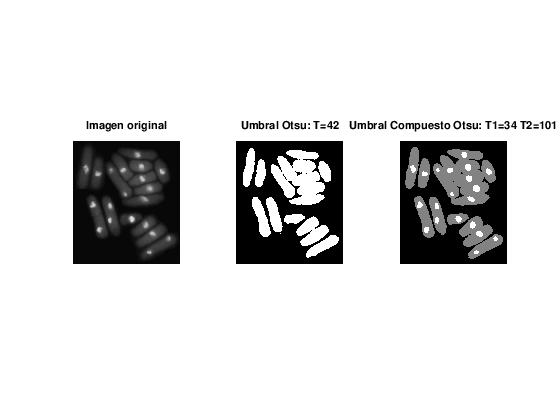

In [4]:
clc; clear; close all;
pkg load image;

% Carga de la imagen original
A = imread('media/umbral-imagen6.jpg');
subplot(1,3,1);
imshow(A);
title('Imagen original')
[m,n] = size(A);

% Umbral con el metodo de Otsu
T = otsu(A);
B = zeros(m,n);
B(A>T) = 1;
B(A<=T) = 0;
subplot(1,3,2);
imshow(B);
title(['Umbral Otsu: T=' num2str(T)]);

% Umbrales con el metodo de otsu para 2 umbrales
[T1,T2] = otsu2(A);
C = im2double(zeros(m,n));
C(T1<A<T2) = 0.5;
C(A<=T1) = 0;
C(T2<=A) = 1;
subplot(1,3,3);
imshow(C);
title(['Umbral Compuesto Otsu: T1=' num2str(T1) ' T2=' num2str(T2)]);